# To explore Supervised Machine Learning - TASK #2

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression tasks involving just two variables.


Independent variable - Hours & 
Dependent variable - Percentage score

In [2]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Reading data from remote link
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully!")
df.head()

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Details of dataset

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### Exploratory Data Analysis

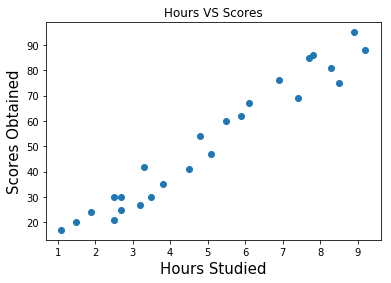

In [6]:
#Plotting how percentage scores varies with number of hours studied
plt.scatter(x=df['Hours'], y=df['Scores'])  
plt.title('Hours VS Scores')  
plt.xlabel('Hours Studied',fontsize=15)  
plt.ylabel('Scores Obtained',fontsize=15)  
plt.show()

From the graph we can infer that there is positive linear relationship between scores and the hours devoted for studying.

### Data Preparation 

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

#### Splitting the data into train set and test set to build our model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=92)

20% of the data will be used to test our algorithm and 80% of the data will be used to train our algorithm.

### Training the model¶

In [9]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
print("Training complete.")

Training complete.


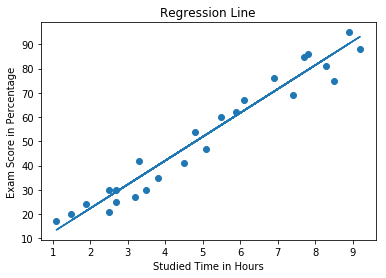

In [10]:
#plotting the regressor line
line =lin_model.coef_*x+lin_model.intercept_
plt.scatter(x,y)
plt.title('Regression Line')
plt.xlabel('Studied Time in Hours')  
plt.ylabel('Exam Score in Percentage')
plt.plot(x, line)
plt.show()

### Making Predictions

In [11]:
test_pred=lin_model.predict(X_test)

### Comparing predicted values and actual values

In [12]:
df1=pd.DataFrame({'Actual':y_test,'Predicated':test_pred})
df1

,Actual,Predicated
0,30,29.212228
1,25,29.212228
2,20,17.398196
3,35,40.041758
4,69,75.483855


Text(0.5, 1.0, 'Predictions')

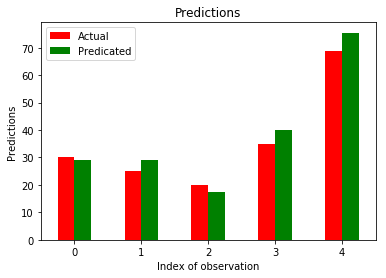

In [13]:
df1.plot.bar(rot=0,color=('red','green'))
plt.xlabel('Index of observation')
plt.ylabel('Predictions')
plt.title('Predictions')

### Prediction for 9.25 hours

In [14]:
hours = 9.25
scores = lin_model.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Prediction Score = {}".format(scores[0]))

Number of hours = 9.25
Prediction Score = 93.69715467410802


### Evaluation of model

In [16]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Mean Absolute Error: 3.825483356587598
Mean Squared Error: 18.518506789393577
Root Mean Squared Error: 4.303313466317969
